In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


angle between different vectors:

- $[X,x] = \alpha$
- $[Thrust,x] = \theta$
- $[Drag, -x] = \beta$

In [2]:
THETA = 3 # in degrees
MASS = 6e3

In [3]:
(1e6 + MASS*0.5*9.8)/np.cos(THETA)

-1039805.8606856888

In [4]:
def thrust(alpha,theta=np.deg2rad(THETA),T=(1e6 + MASS*0.5*9.8)/np.cos(np.deg2rad(THETA))):
    """ 
    calculates thrust in inertial (parent) direction
    inputs:
    - alpha in rad
    - theta in rad
    - T in N (absolute value of net thrust)

    output:
    - 2D vector

    Notes: value of T*cos(theta) = Drag + ma
    """
    return np.array([T*np.cos(-alpha+theta),-T*np.sin(-alpha+theta)])

In [5]:
def drag(alpha,beta,D = 1e6):
    """
    calculates drag in inertial (parent) direction
    inputs:
    - alpha in rad
    - beta in rad
    - D in N (absolute value of net thrust)

    output: 
    - 2D vector
    """
    return np.array([-D*np.cos(beta-alpha),D*np.sin(beta-alpha)])

In [6]:
def R_i2b(alpha,vec):
    """ 
    returns rotated vector in the body frame (x,y) from the interial {parent (X,Y)}
    alpha in rad
    """
    rotMat = np.array( [ [ np.cos(alpha), np.sin(alpha) ], [ -np.sin(alpha), np.cos(alpha)] ] )   
    return np.matmul(rotMat,vec)

In [7]:
def moment(alpha, drag, l = 0.1):
    """ 
    calculates positive value standard right hand rule i.e. outside plane moment is positive
    """
    dragRot = -R_i2b(alpha,drag)
    return drag[1]*l

In [8]:
def moi(m=6000,r=2.5,l=5):
    """
    moment of intertia, will be used in future for variable mass and exact CG location
    """
    return m*(0.25*r**2 + (1/12)*l**2)

In [9]:
def betaFromV(alpha, v):
    """
    input:
    - alpha in radians
    - velocity vector in inertial frame
    output:
    - in radians
    """
    vRot = R_i2b(alpha,v) # transform velcity vector from parent to pod frame
    return np.arctan(-v[1]/v[0])

In [10]:
def updateV(vo, T, D, dt = 0.001, m = MASS):
    """
    newton's law
    """
    return vo + ((T+D)/m)*dt

In [11]:
def updateAlphadot(alphaDot, moment, moi, dt = 0.001):
    """
    we know that doube derivative of alpha wrt time is net_Torque/Moment of inertia
    input:
    - rad/sec
    - N-m
    - kg-m^2
    """
    return alphaDot + (moment/moi)*dt

In [12]:
def updateAlpha(alphao, alphaDot, dt = 0.001):
    """ 
    took modulus for plots
    """
    return (alphao + alphaDot*dt)%(2*np.pi)

In [13]:
t = np.arange(0,5.001,0.001)

In [14]:
alph = np.zeros(len(t))
bet = np.zeros(len(t))
T = np.zeros((len(t),2))
D = np.zeros((len(t),2))
V = np.zeros((len(t),2))
alphDot = np.zeros(len(t))

In [15]:
T[0] = thrust(alph[0])
D[0] = drag(alph[0],bet[0])
V[0] = np.array([600,0])

In [16]:
I = moi()

In [17]:
for i in range(1,len(t)):
    V[i] = updateV(V[i-1],T[i-1],D[i-1])
    bet[i] = betaFromV(alph[i-1],V[i])
    tau = moment(alph[i-1],D[i-1])
    alphDot[i] = updateAlphadot(alphDot[i-1],tau,I)
    alph[i] = updateAlpha(alph[i-1],alphDot[i-1])
    T[i] = thrust(alph[i])
    D[i] = drag(alph[i],bet[i])

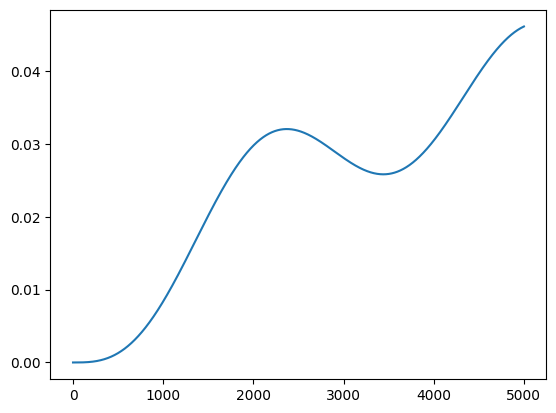

In [18]:

plt.plot(alph)

Text(0, 0.5, 'AOA for drag in degree')

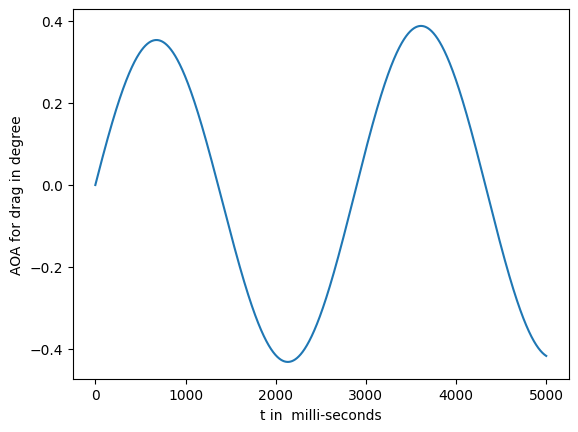

In [25]:
plt.plot((bet-alph)*180/np.pi)
plt.xlabel("t in  milli-seconds")
plt.ylabel("AOA for drag in degree")

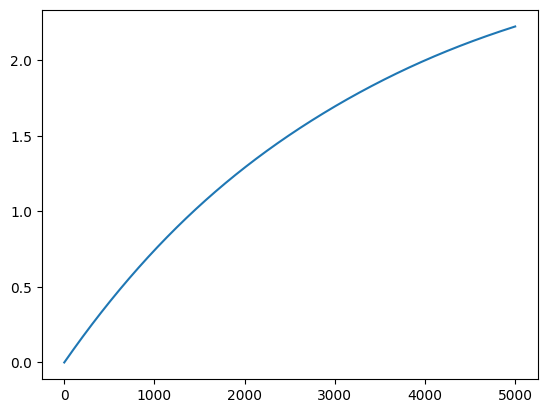

In [20]:
plt.plot(bet*180/np.pi)

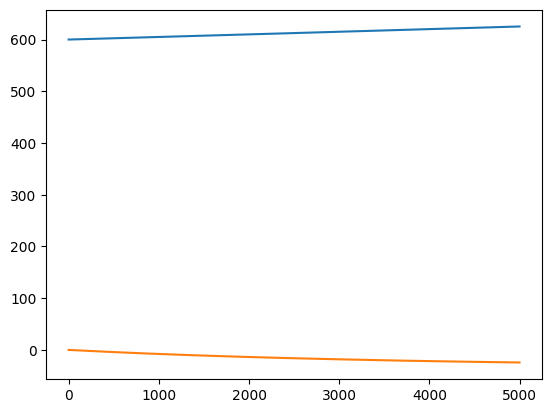

In [21]:
plt.plot(V)

In [22]:
s = 0
for i in V:
    s = s+i[1]*0.001

In [23]:
s

-74.180496707667

In [24]:
(T[0][1]+D[0][1])/MASS

-8.99142799899377

In [26]:
D[0][1]

0.0